<a href="https://colab.research.google.com/github/ksizorCode/visionado/blob/main/M3_Caracteristicas_Imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Detección de Características en Imágenes
Una imagen digital es una matriz de píxeles, donde cada píxel representa una combinación de colores codificada (por ejemplo, RGB). Para que una máquina pueda "entender" una imagen, es necesario extraer características relevantes como bordes, esquinas, texturas, puntos clave, etc. A continuación se presentan los filtros y detectores más comunes en visión por ordenador.

## 🔍 Detectores de Bordes
Los detectores de bordes son algoritmos utilizados en procesamiento de imágenes para identificar zonas donde hay cambios bruscos de intensidad. Estos cambios suelen corresponder a los contornos de objetos dentro de una imagen, y son fundamentales en tareas como segmentación, reconocimiento de formas y visión por computadora.


Detectar bordes permite:
- Resaltar estructuras relevantes en imágenes.
- Facilitar el análisis de formas y objetos.
- Reducir la cantidad de datos manteniendo información clave.

Tipos y enfoques comunes:
Gradiente (primera derivada): Miden el cambio en la intensidad (ej. Sobel, Prewitt, Scharr).

Detectan bordes donde hay transiciones abruptas.

Laplace (segunda derivada): Miden la tasa de cambio del gradiente (ej. operador Laplaciano).

Detectan puntos donde el cambio es máximo, pero son más sensibles al ruido.

Algoritmos más avanzados: Canny: combina suavizado, gradiente y umbralización para obtener bordes finos y continuos con mínima respuesta al ruido.

Roberts: usa un kernel pequeño (2x2), rápido pero muy básico.

En resumen, los detectores de bordes transforman imágenes complejas en representaciones más simples y estructuradas, permitiendo una interpretación más eficiente por parte de sistemas de visión artificial.

---

| Detector | Características                                                      | Ventajas                                                | Desventajas                                               | Uso Típico                             |
|----------|----------------------------------------------------------------------|----------------------------------------------------------|------------------------------------------------------------|----------------------------------------|
| Canny    | Algoritmo en 3 etapas, incluye suavizado, gradiente y umbralización por histéresis | Alta precisión, bordes delgados y continuos, buena supresión de ruido | Computacionalmente costoso, requiere ajuste de parámetros | Segmentación, contornos precisos       |
| Sobel    | Operador de gradiente 3x3, direcciones X/Y                           | Rápido, simple, buena detección de bordes fuertes        | Menos preciso en esquinas, bordes gruesos                 | Detección rápida, preprocesamiento     |
| Scharr   | Variante mejorada de Sobel, mayor precisión angular                  | Preciso, buena respuesta a detalles finos                | Ligero aumento de coste computacional                     | Detección de bordes con precisión angular |
| Laplace  | Operador de segunda derivada, respuesta isotrópica                   | Detecta bordes finos, rotación invariante                | Muy sensible al ruido, puede generar bordes dobles        | Realce de detalles, detección general de bordes |
| Prewitt  | Similar a Sobel, kernels simples 3x3                                 | Muy rápido, fácil de implementar                         | Menos preciso, más sensible al ruido                      | Aplicaciones en tiempo real            |
| Roberts  | Kernel 2x2, muy simple y rápido                                      | Muy rápido, bajo coste computacional                     | Muy sensible al ruido, discontinuidades                   | Detección básica en imágenes simples   |


In [14]:
# Librerías a utilizar:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

In [15]:

# --- 1. CONFIGURACIÓN INICIAL Y CARGA DE IMAGEN ---

# URL de una imagen de ejemplo
url_imagen ="https://static.wikia.nocookie.net/esstarwars/images/0/0d/Reina_Amidala.jpg/revision/latest?cb=20080808001232"

# Descargar la imagen
try:
    response = requests.get(url_imagen, stream=True)
    response.raise_for_status()
    image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
except requests.exceptions.RequestException as e:
    print(f"Error al descargar la imagen: {e}")
    # Usar una imagen de muestra de Colab si la descarga falla
    from sklearn.datasets import load_sample_image
    img = cv2.cvtColor(load_sample_image("flower.jpg"), cv2.COLOR_RGB2BGR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



OpenCV error during HED processing: OpenCV(4.11.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1162: error: (-2:Unspecified error) FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse NetParameter file: deploy.prototxt in function 'ReadNetParamsFromTextFileOrDie'



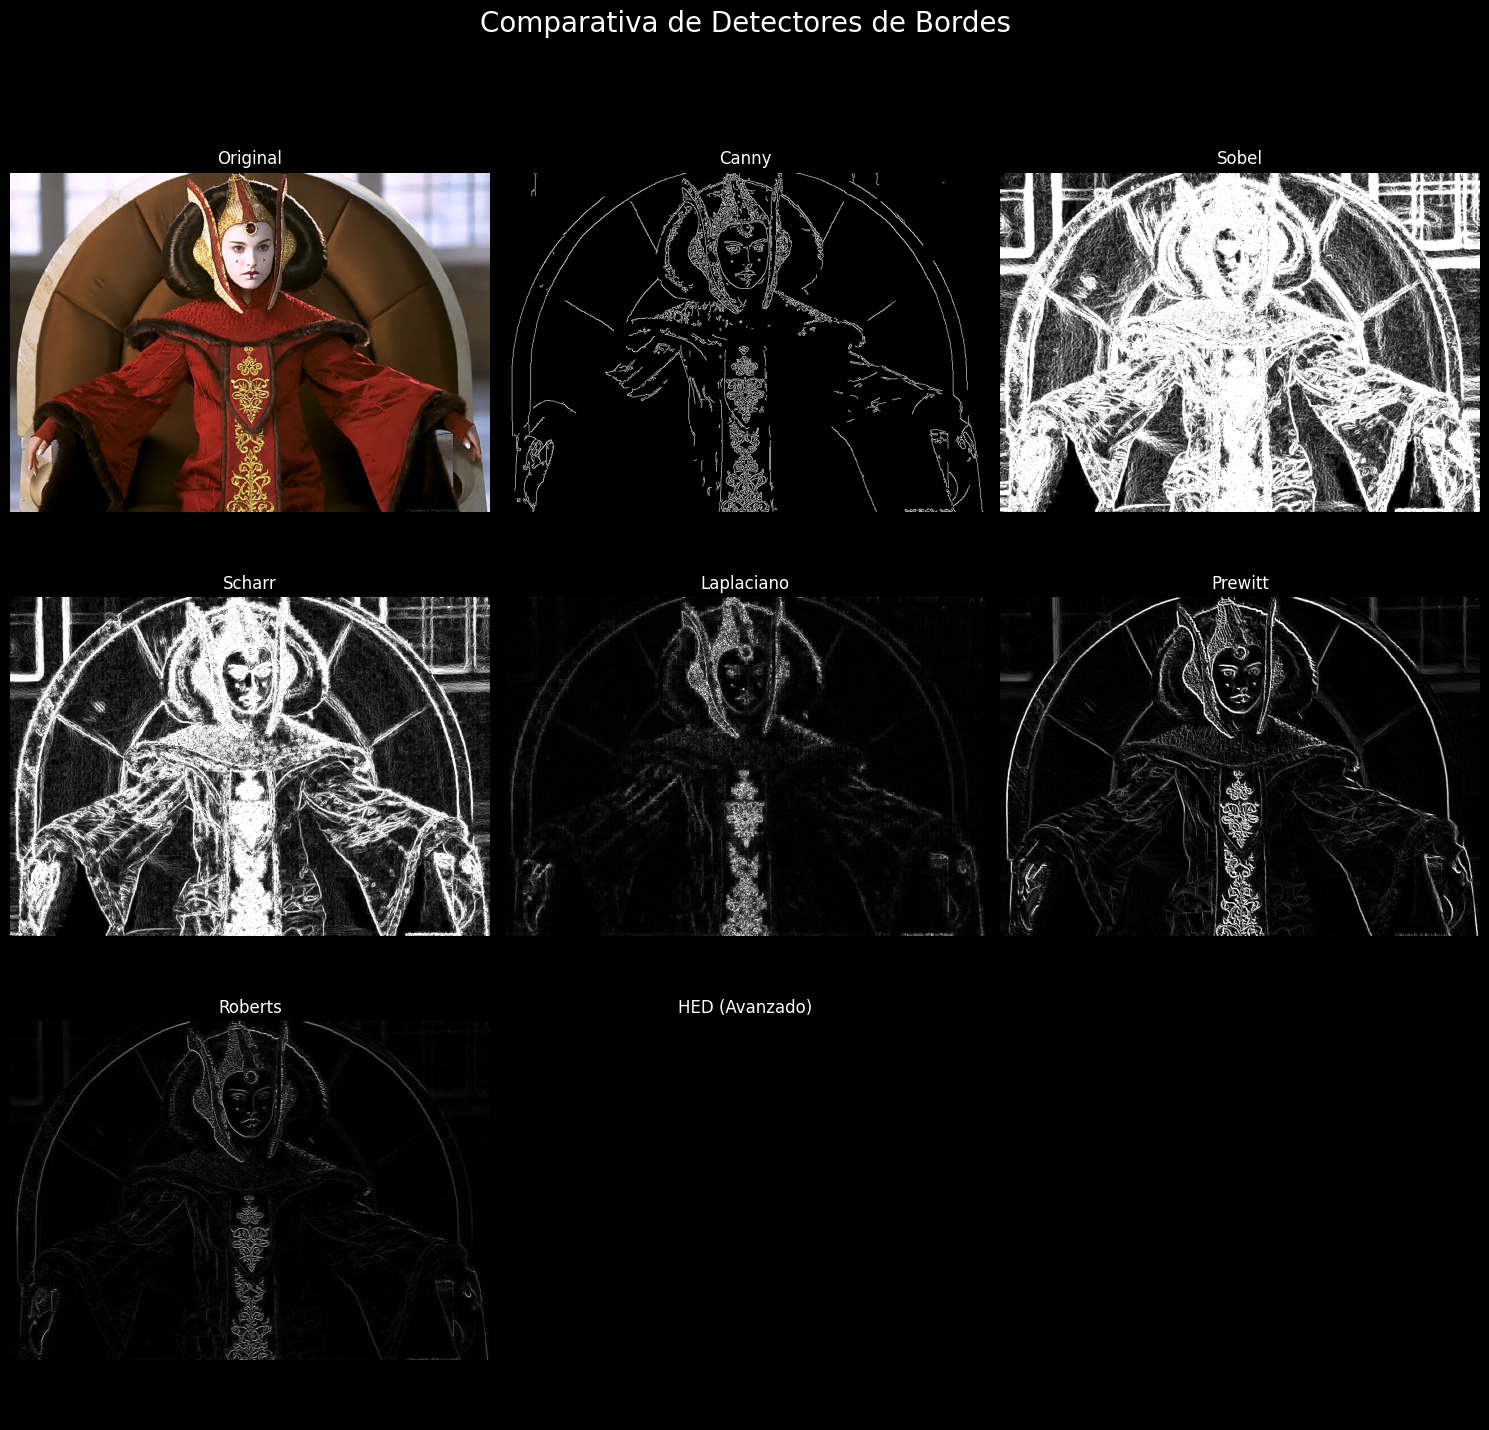

In [16]:

# --- 2. DETECTORES DE BORDES CLÁSICOS ---

# Canny: El más popular y efectivo de los clásicos
canny = cv2.Canny(img_gray, 100, 200)

# Sobel: Detecta bordes horizontales y verticales
sobel_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.bitwise_or(cv2.convertScaleAbs(sobel_x), cv2.convertScaleAbs(sobel_y))

# Scharr: Variante de Sobel, a veces más precisa para gradientes finos
scharr_x = cv2.Scharr(img_gray, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img_gray, cv2.CV_64F, 0, 1)
scharr = cv2.bitwise_or(cv2.convertScaleAbs(scharr_x), cv2.convertScaleAbs(scharr_y))

# Laplaciano (Laplace): Detecta regiones de cambio rápido de intensidad
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Prewitt (implementación manual, no está en OpenCV por defecto)
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_x = cv2.filter2D(img_gray, -1, kernelx)
prewitt_y = cv2.filter2D(img_gray, -1, kernely)
prewitt = cv2.bitwise_or(prewitt_x, prewitt_y)

# Roberts (implementación manual)
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(img_gray, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(img_gray, -1, kernel_roberts_y)
roberts = cv2.bitwise_or(roberts_x, roberts_y)


# --- 3. DETECTOR AVANZADO: HOLISTICALLY-NESTED EDGE DETECTION (HED) ---

# Descargar el modelo pre-entrenado de HED
# (Crop layer no es soportada por defecto en OpenCV DNN, se usa un modelo adaptado)
proto_path = "deploy.prototxt"
model_path = "hed_pretrained_bsds.caffemodel"

# Descargar los archivos del modelo
# Using a different prototxt that is known to work better with OpenCV DNN
url_proto = "https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/hed_deploy.prototxt"
url_model = "https://github.com/ashishkumar-hub/HED/raw/main/hed_pretrained_bsds.caffemodel"

try:
    proto_file = requests.get(url_proto)
    with open(proto_path, 'wb') as f:
        f.write(proto_file.content)

    model_file = requests.get(url_model)
    with open(model_path, 'wb') as f:
        f.write(model_file.content)

    # Cargar la red
    net = cv2.dnn.readNetFromCaffe(proto_path, model_path)

    # Pre-procesar la imagen para HED
    # The mean values might need adjustment depending on the model's training data
    blob = cv2.dnn.blobFromImage(img, scalefactor=1.0, size=(500, 500),
                               mean=(104.00698793, 116.66876762, 122.67891434),
                               swapRB=False, crop=False)
    net.setInput(blob)
    hed = net.forward()
    hed = cv2.resize(hed[0, 0], (img.shape[1], img.shape[0]))
    hed = (255 * hed).astype("uint8")

except requests.exceptions.RequestException as e:
    print(f"No se pudo descargar el modelo HED: {e}")
    hed = np.zeros_like(img_gray) # Fallback
except cv2.error as e:
    print(f"OpenCV error during HED processing: {e}")
    hed = np.zeros_like(img_gray) # Fallback


# --- 4. VISUALIZACIÓN DE RESULTADOS ---

plt.style.use('dark_background')
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Comparativa de Detectores de Bordes', fontsize=20)

# Títulos y imágenes a mostrar
titles = ['Original', 'Canny', 'Sobel', 'Scharr', 'Laplaciano', 'Prewitt', 'Roberts', 'HED (Avanzado)']
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB), canny, sobel, scharr, laplacian, prewitt, roberts, hed]

# Llenar la cuadrícula de imágenes
for i, ax in enumerate(axes.flat):
    if i < len(images):
        ax.imshow(images[i], cmap='gray' if i > 0 else None)
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        ax.axis('off') # Ocultar ejes no usados

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 🎯 Detectores de Esquinas
Los detectores de esquinas buscan identificar puntos en una imagen donde los cambios de intensidad ocurren en múltiples direcciones. Es decir, esquinas o intersecciones de bordes. Estos puntos suelen ser buenos para rastrear o comparar entre imágenes debido a su estabilidad.

¿Por qué son útiles?
Son ideales para seguimiento de movimiento, reconocimiento de objetos, y SLAM (localización y mapeo simultáneo).

Sirven como puntos clave para descriptores (como ORB, SIFT, SURF).

Tipos principales:
Solo esquinas: Harris, Shi-Tomasi, FAST → Más rápidos, usados para detección pura.

Esquinas + descriptores: ORB, SIFT, SURF → Incluyen información adicional para "describir" la región, útil en matching entre imágenes.


| Detector                  | Tipo                    | Características                                             | Ventajas                                                   | Desventajas                                               | Uso Típico                                     |
|--------------------------|-------------------------|-------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|------------------------------------------------|
| Harris                   | Esquinas                | Basado en autovalores de la matriz de covarianza            | Preciso, resistente al ruido moderado                      | No invariante a escala                                     | Seguimiento de puntos clave, visión 3D        |
| Shi-Tomasi (Good Features to Track) | Esquinas      | Mejora de Harris, selecciona esquinas más "fuertes"         | Mejora la calidad de esquinas detectadas                   | No apto para grandes cambios de escala                     | Seguimiento de objetos en video               |
| FAST                     | Esquinas                | Análisis de vecindad circular de píxeles                    | Muy rápido, apto para tiempo real                          | No robusto frente a ruido o rotación                       | SLAM, robótica móvil                          |
| ORB                      | Esquinas + Descriptores | Combina FAST y BRIEF, eficiente y rotación invariante       | Rápido, eficiente, libre de patentes                       | Menos preciso que SIFT o SURF                              | Matching en tiempo real, aplicaciones móviles |
| SIFT                     | Esquinas + Descriptores | Escala invariante, detección multiescala                    | Muy robusto, invariante a escala, rotación, iluminación    | Patente (hasta 2020), computacionalmente costoso           | Matching robusto, reconocimiento de objetos    |
| SURF                     | Esquinas + Descriptores | Más rápido que SIFT, basado en Haar wavelets                | Rápido, preciso                                            | Aún patentado, menos robusto que SIFT en algunas condiciones | Reconocimiento, matching rápido               |



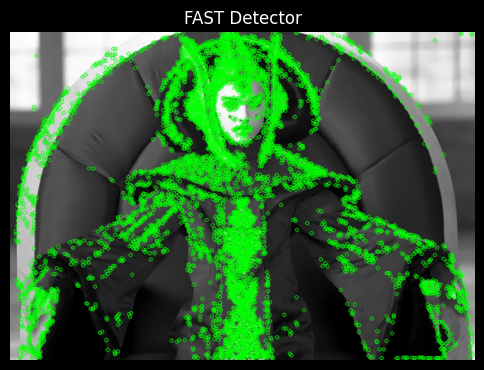

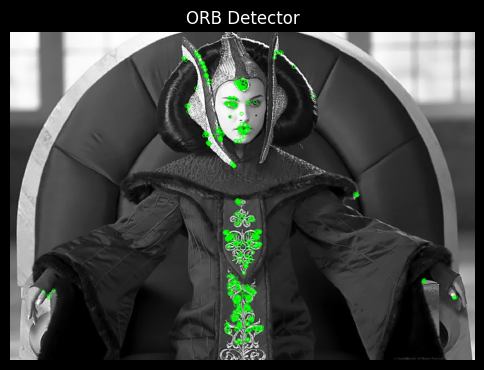

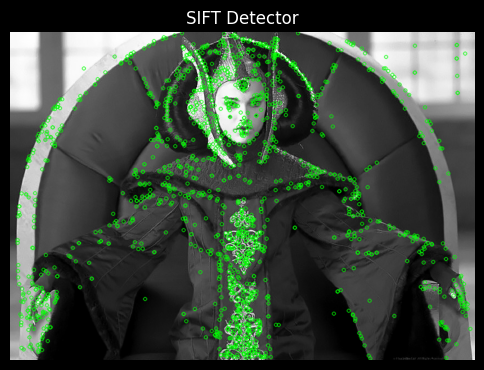

SURF no está disponible. Verifica instalación y licencias.


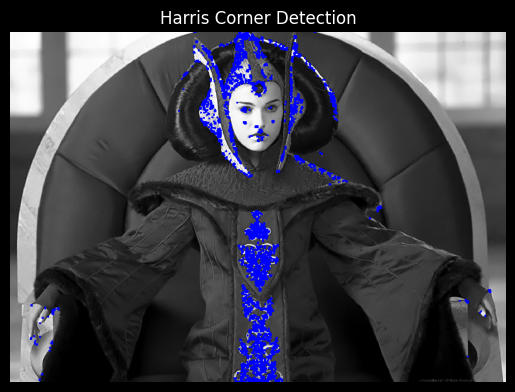

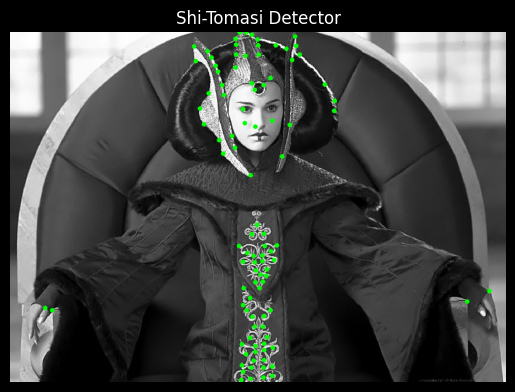

In [17]:

# Asegúrate de que img_gray está definida y es una imagen en escala de grises

def show_keypoints(image, keypoints, title):
    img_kp = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Harris Corner Detector
def harris_detector(img_gray):
    img_copy = img_gray.copy()
    img_copy = np.float32(img_copy)
    harris = cv2.cornerHarris(img_copy, blockSize=2, ksize=3, k=0.04)
    harris = cv2.dilate(harris, None)
    result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    result[harris > 0.01 * harris.max()] = [0, 0, 255]
    plt.imshow(result)
    plt.title('Harris Corner Detection')
    plt.axis('off')
    plt.show()

# Shi-Tomasi (Good Features to Track)
def shi_tomasi_detector(img_gray):
    corners = cv2.goodFeaturesToTrack(img_gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
    corners = np.intp(corners)
    result = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR)
    for i in corners:
        x, y = i.ravel()
        cv2.circle(result, (x, y), 4, (0, 255, 0), -1)
    plt.imshow(result)
    plt.title('Shi-Tomasi Detector')
    plt.axis('off')
    plt.show()

# FAST
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(img_gray, None)
show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_fast, 'FAST Detector')

# ORB
orb = cv2.ORB_create()
kp_orb = orb.detect(img_gray, None)
show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_orb, 'ORB Detector')

# SIFT (requiere opencv-contrib)
try:
    sift = cv2.SIFT_create()
    kp_sift = sift.detect(img_gray, None)
    show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_sift, 'SIFT Detector')
except:
    print("SIFT no está disponible. Asegúrate de tener instalado OpenCV con contrib.")

# SURF (requiere opencv-contrib y puede estar restringido por licencia)
try:
    surf = cv2.xfeatures2d.SURF_create()
    kp_surf = surf.detect(img_gray, None)
    show_keypoints(cv2.cvtColor(img_gray, cv2.COLOR_GRAY2BGR), kp_surf, 'SURF Detector')
except:
    print("SURF no está disponible. Verifica instalación y licencias.")

# Harris y Shi-Tomasi por separado
harris_detector(img_gray)
shi_tomasi_detector(img_gray)

# 🌀 Detectores de Textura

La textura se refiere a los patrones repetitivos o estructuras locales en una imagen que ayudan a describir la apariencia de una superficie (por ejemplo: rugosa, lisa, granulada, etc.). A diferencia de los bordes o esquinas, la textura analiza cómo cambian los valores de los píxeles en una región, no solo en un punto

| Detector        | Tipo    | Características                                    | Ventajas                                             | Desventajas                                           | Uso Típico                                 |
|-----------------|---------|----------------------------------------------------|-------------------------------------------------------|--------------------------------------------------------|---------------------------------------------|
| LBP             | Textura | Codifica vecindad local como patrón binario        | Muy rápido, simple, invariante a iluminación         | No maneja bien ruido o variaciones de escala          | Clasificación de texturas, reconocimiento facial |
| Gabor Filters   | Textura | Conjuntos de filtros orientados y a distintas frecuencias | Buena extracción de textura y orientación            | Alto coste computacional                              | Análisis de texturas, biometría             |
| Haralick        | Textura | Usa matrices de co-ocurrencia (GLCM)               | Extrae múltiples características estadísticas        | Depende del tamaño y orientación de la ventana        | Clasificación de patrones y análisis de texturas |



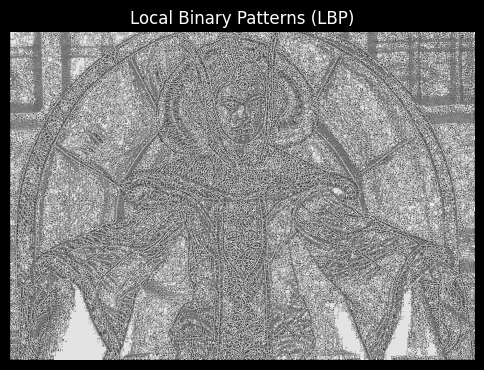

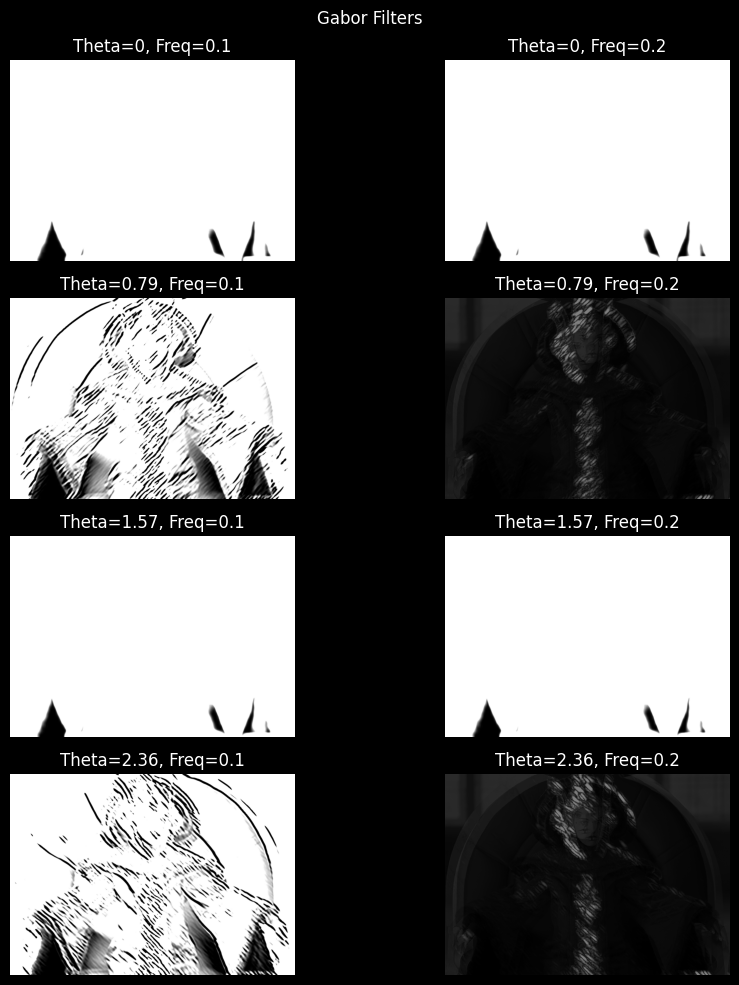

Haralick Features (GLCM):
 - Contrast: 265.8475
 - Homogeneity: 0.4290
 - Energy: 0.0375
 - Correlation: 0.9705


In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops # Corrected import
from skimage import img_as_ubyte
import scipy.ndimage as nd

# Asegúrate de que img_gray está definida (escala de grises)

### 1. Local Binary Patterns (LBP)
def lbp_texture(img_gray, radius=1, n_points=8):
    lbp = local_binary_pattern(img_gray, n_points, radius, method='uniform')
    plt.figure(figsize=(6, 6))
    plt.imshow(lbp, cmap='gray')
    plt.title('Local Binary Patterns (LBP)')
    plt.axis('off')
    plt.show()

### 2. Filtros de Gabor
def gabor_filter_bank(img_gray):
    def apply_gabor(theta, frequency):
        kernel = cv2.getGaborKernel((21, 21), 5.0, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
        filtered = cv2.filter2D(img_gray, cv2.CV_8UC3, kernel)
        return filtered

    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    frequencies = [0.1, 0.2]

    fig, axs = plt.subplots(len(angles), len(frequencies), figsize=(10, 10))
    for i, theta in enumerate(angles):
        for j, freq in enumerate(frequencies):
            result = apply_gabor(theta, freq)
            axs[i, j].imshow(result, cmap='gray')
            axs[i, j].set_title(f'Theta={np.round(theta,2)}, Freq={freq}')
            axs[i, j].axis('off')
    plt.suptitle('Gabor Filters')
    plt.tight_layout()
    plt.show()

### 3. Haralick (GLCM)
def haralick_features(img_gray):
    # Convert to 8-bit
    img_ubyte = img_as_ubyte(img_gray)
    glcm = graycomatrix(img_ubyte, distances=[1], angles=[0], symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]

    print("Haralick Features (GLCM):")
    print(f" - Contrast: {contrast:.4f}")
    print(f" - Homogeneity: {homogeneity:.4f}")
    print(f" - Energy: {energy:.4f}")
    print(f" - Correlation: {correlation:.4f}")

# Ejecutar todos
lbp_texture(img_gray)
gabor_filter_bank(img_gray)
haralick_features(img_gray)

# 🧬 Otros Detectores / Redes Neuronales
| Detector           | Tipo                   | Características                                       | Ventajas                                        | Desventajas                          | Uso Típico                           |
|--------------------|------------------------|------------------------------------------------------|------------------------------------------------|-------------------------------------|------------------------------------|
| HED (Holistically-Nested Edge Detection) | Bordes (deep learning) | Red neuronal para detección de bordes a múltiples escalas | Resultados precisos y suaves, adaptable        | Requiere entrenamiento, uso de GPU  | Segmentación semántica, aplicaciones médicas |
| CNN Features       | General                | Extracción de características profundas              | Invariante a múltiples transformaciones, adaptativo | Requiere gran cantidad de datos      | Visión profunda, clasificación, detección de objetos |


Attempting to download HED model files...
Downloaded hed_deploy.prototxt
Downloaded hed_pretrained_bsds.caffemodel
Loading HED network...
OpenCV error during HED processing: OpenCV(4.11.0) /io/opencv/modules/dnn/src/caffe/caffe_io.cpp:1162: error: (-2:Unspecified error) FAILED: ReadProtoFromTextFile(param_file, param). Failed to parse NetParameter file: hed_deploy.prototxt in function 'ReadNetParamsFromTextFileOrDie'

HED model not available due to OpenCV error.


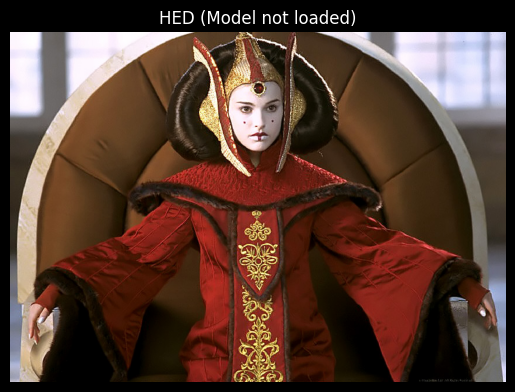

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import requests # Import requests for downloading files

# img_rgb must be the loaded image in RGB format (e.g., with cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
# We will use the 'img' variable which is already loaded as a color image

# --- 1. Detección de bordes con HED preentrenado (OpenCV DNN) ---
# Descarga los archivos si no los tienes (puedes subirlos a Colab o usar URLs)

proto_path = 'hed_deploy.prototxt' # Use a different name to avoid conflict
model_path = 'hed_pretrained_bsds.caffemodel'

# If you don't have the files, you can download them like this:
url_proto = "https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/hed_deploy.prototxt"
url_model = "https://github.com/ashishkumar-hub/HED/raw/main/hed_pretrained_bsds.caffemodel"

try:
    print("Attempting to download HED model files...")
    proto_file = requests.get(url_proto)
    with open(proto_path, 'wb') as f:
        f.write(proto_file.content)
    print(f"Downloaded {proto_path}")

    model_file = requests.get(url_model)
    with open(model_path, 'wb') as f:
        f.write(model_file.content)
    print(f"Downloaded {model_path}")

    # Cargar la red
    print("Loading HED network...")
    net = cv2.dnn.readNetFromCaffe(proto_path, model_path)
    print("HED network loaded successfully.")

    def hed_edge_detection(image_color):
        # Prepara la imagen para la red HED
        # Use the mean values specified in the original HED paper/implementation
        blob = cv2.dnn.blobFromImage(image_color, scalefactor=1.0, size=(image_color.shape[1], image_color.shape[0]),
                                     mean=(104.00698793, 116.66876762, 122.67891434), swapRB=False, crop=False)
        net.setInput(blob)
        hed = net.forward()
        # The output is a list of outputs from each scale. We take the fused output (index 0)
        # and the first channel (index 0)
        hed = hed[0, 0]

        # Resize the output back to the original image size
        hed = cv2.resize(hed, (image_color.shape[1], image_color.shape[0]))

        # Convert the output to uint8 (0-255)
        hed = (255 * hed).astype("uint8")

        plt.imshow(hed, cmap='gray')
        plt.title('HED Edge Detection')
        plt.axis('off')
        plt.show()

except requests.exceptions.RequestException as e:
    print(f"No se pudo descargar el modelo HED: {e}")
    # Define a placeholder function or handle error appropriately if download fails
    def hed_edge_detection(image_color):
        print("HED model not available due to download error.")
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.title('HED (Model not loaded)')
        plt.axis('off')
        plt.show()
except cv2.error as e:
    print(f"OpenCV error during HED processing: {e}")
    # Define a placeholder function or handle error appropriately if loading fails
    def hed_edge_detection(image_color):
        print("HED model not available due to OpenCV error.")
        plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
        plt.title('HED (Model not loaded)')
        plt.axis('off')
        plt.show()


# --- 2. Extracción de características CNN (VGG16) ---
def cnn_feature_extraction(image_rgb):
    model = VGG16(weights='imagenet', include_top=False)
    img_resized = cv2.resize(image_rgb, (224, 224))
    img_array = np.expand_dims(img_resized, axis=0)
    img_preprocessed = preprocess_input(img_array.astype(np.float32))
    features = model.predict(img_preprocessed)
    print(f"Características extraídas con VGG16: {features.shape}")
    # Mostrar el primer canal del primer mapa de características
    plt.imshow(features[0, :, :, 0], cmap='viridis')
    plt.title('Primer mapa de características CNN (VGG16)')
    plt.axis('off')
    plt.show()

# Example usage (ensure img is defined - it's loaded in the first cell):
hed_edge_detection(img)
# To use cnn_feature_extraction, you would need an RGB image.
# Since 'img' is BGR from cv2.imread, convert it to RGB first:
# img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cnn_feature_extraction(img_rgb)

# 🧑‍💻 Detección y Reconocimiento Facial

| Método                     | Tipo   | Características                              | Ventajas                                  | Desventajas                       | Uso Típico                    |
|----------------------------|--------|----------------------------------------------|--------------------------------------------|----------------------------------|-------------------------------|
| Haar Cascades              | Facial | Basado en adaboost, utiliza patrones Haar    | Rápido en detección frontal                | Falla con ángulos o iluminación compleja | Detección facial básica       |
| Dlib (HOG + SVM)           | Facial | Usa Histogramas de Gradientes + SVM          | Buen rendimiento sin GPU                    | Menos preciso que deep learning  | Detección facial 2D           |
| DeepFace / FaceNet / ArcFace | Facial | Redes profundas para embeddings faciales    | Alta precisión, resistente a variaciones  | Requiere mucha computación       | Reconocimiento facial en producción |


In [25]:
import cv2
import dlib
import matplotlib.pyplot as plt
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np

# img_rgb: Imagen RGB cargada

# --- 1. Detección con Haar Cascades ---
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces_haar(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    faces = haar_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)
    img_out = img_rgb.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(img_out, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(img_out)
    plt.title('Detección Facial con Haar Cascades')
    plt.axis('off')
    plt.show()

# --- 2. Detección con Dlib (HOG + SVM) ---
detector_dlib = dlib.get_frontal_face_detector()

def detect_faces_dlib(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    faces = detector_dlib(img_gray)
    img_out = img_rgb.copy()
    for face in faces:
        x, y, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(img_out, (x, y), (x2, y2), (0, 255, 0), 2)
    plt.imshow(img_out)
    plt.title('Detección Facial con Dlib')
    plt.axis('off')
    plt.show()

# --- 3. Reconocimiento Facial con FaceNet (facenet-pytorch) ---
device = 'cuda' if torch.cuda.is_available() else 'cpu'

mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

def extract_face_embedding(img_rgb):
    face = mtcnn(img_rgb)
    if face is not None:
        with torch.no_grad():
            embedding = resnet(face.unsqueeze(0).to(device))
        print("Embedding facial extraído:", embedding.shape)
        return embedding.cpu().numpy()
    else:
        print("No se detectó rostro.")
        return None

# Ejemplo de uso:
# detect_faces_haar(img_rgb)
# detect_faces_dlib(img_rgb)
# embedding = extract_face_embedding(img_rgb)


ModuleNotFoundError: No module named 'facenet_pytorch'

In [ ]:
!pip install facenet-pytorch dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 93.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 606.4/731.7 MB 71.3 MB/s eta 0:00:02

In [ ]:
import cv2
import dlib
import matplotlib.pyplot as plt
# from facenet_pytorch import MTCNN, InceptionResnetV1 # Uncomment after installing facenet-pytorch
# import torch
import numpy as np

# img_rgb: Imagen RGB cargada

# --- 1. Detección con Haar Cascades ---
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces_haar(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    faces = haar_cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=5)
    img_out = img_rgb.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(img_out, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(img_out)
    plt.title('Detección Facial con Haar Cascades')
    plt.axis('off')
    plt.show()

# --- 2. Detección con Dlib (HOG + SVM) ---
detector_dlib = dlib.get_frontal_face_detector()

def detect_faces_dlib(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    faces = detector_dlib(img_gray)
    img_out = img_rgb.copy()
    for face in faces:
        x, y, x2, y2 = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(img_out, (x, y), (x2, y2), (0, 255, 0), 2)
    plt.imshow(img_out)
    plt.title('Detección Facial con Dlib')
    plt.axis('off')
    plt.show()

# --- 3. Reconocimiento Facial con FaceNet (facenet-pytorch) ---
# device = 'cuda' if torch.cuda.is_available() else 'cpu' # Uncomment after installing facenet-pytorch

# mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20, device=device) # Uncomment after installing facenet-pytorch
# resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device) # Uncomment after installing facenet-pytorch

# def extract_face_embedding(img_rgb): # Uncomment after installing facenet-pytorch
#     face = mtcnn(img_rgb) # Uncomment after installing facenet-pytorch
#     if face is not None: # Uncomment after installing facenet-pytorch
#         with torch.no_grad(): # Uncomment after installing facenet-pytorch
#             embedding = resnet(face.unsqueeze(0).to(device)) # Uncomment after installing facenet-pytorch
#         print("Embedding facial extraído:", embedding.shape) # Uncomment after installing facenet-pytorch
#         return embedding.cpu().numpy() # Uncomment after installing facenet-pytorch
#     else: # Uncomment after installing facenet-pytorch
#         print("No se detectó rostro.") # Uncomment after installing facenet-pytorch
#         return None # Uncomment after installing facenet-pytorch

# Ejemplo de uso:
# detect_faces_haar(img_rgb) # Uncomment and provide img_rgb
# detect_faces_dlib(img_rgb) # Uncomment and provide img_rgb
# embedding = extract_face_embedding(img_rgb) # Uncomment and provide img_rgb